In [1]:
folder = '../data/log/'
files = ! ls $folder
print(files)

['0', '0_exploit', '1', '20211106162551', '20211106162710', '20211106162814', '20211106163320', '20211106171041', '20211108125723', '20211108163250', '20211108163321', '20211108200619', '20211108205431', '20211108231924', '20211109093812', '20211109103252', '20211109133935', '20211109134134', '20211109134457', '20211109142032', '20211109144245', '20220105_2054', '20220109170920', '20220109204153', '20220112_0004_exploit', '20220112134633', '20220112151047', '20220112162741', '20220112162953', '20220112170417', '20220112170451', '20220112172129', '20220112173640', '20220112181028', '20220112184445', '20220112185551', '20220112185631', '20220112185814', '20220112185849', '20220112190016', '20220112190238', '20220112204059', '20220112204243', '20220112204415', '20220112204517', '20220112204612', '20220112204725', '20220112204740', '20220112205045', '20220115_0159_exploit', '20220115193149', '20220115212151', '20220115212747', '20220116204408_exploit_10000', '20220116204408_exploit_100000'

In [2]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'

def plot(data, label='reward', smooth_radius=200, savepath=None, range=10**8):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    colors = ['r', 'b', 'c', 'y']
    
    for (k, v), c in zip(data.items(), colors):
        v=np.array(v)
        plt.plot(smooth(v[:range], radius=smooth_radius), color=c, label=k)
        plt.plot(v[:range], color=c, alpha=0.3)
    plt.legend()
    plt.grid()
    plt.title(label)
    plt.xlabel('episode')
    plt.ylabel(label)
    if savepath is not None:
        plt.savefig(savepath, bbox_inches='tight',)
    
img_path = 'generated_img/'

log/20220105_2054/pettingzoo_boxing_v1_nash_dqn/update_20220105_2054.json
dict_keys(['loss'])


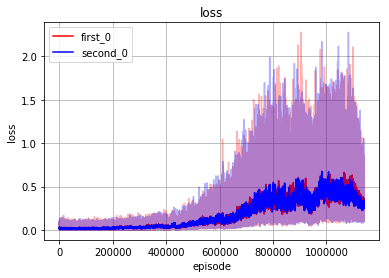

In [13]:
# a first unexploitable agent by sp on boxing
file_name =  '20220105_2054/pettingzoo_boxing_v1_nash_dqn/update_20220105_2054.json'
data = load_data(file_name)
# print(data['loss'].keys())
plot(data['loss'], 'loss', smooth_radius=20, savepath='loss.png')
plt.show()
# plot({'length': data['loss']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
# plt.show()
# plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

../data/log/20220405_1609_exploit/pettingzoo_boxing_v1_nash_dqn_factorized
dict_keys(['episode_reward', 'loss', 'episode_length'])


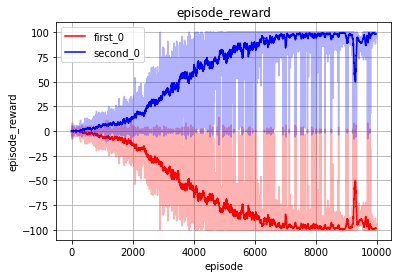

In [6]:
file_name =  '20220405_1609_exploit/pettingzoo_boxing_v1_nash_dqn_factorized'
data = load_data(file_name)
plot(data['episode_reward'], 'episode_reward', smooth_radius=20, savepath='reward.png')
plt.show()

../data/log/20220405_1609_exploit/pettingzoo_boxing_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


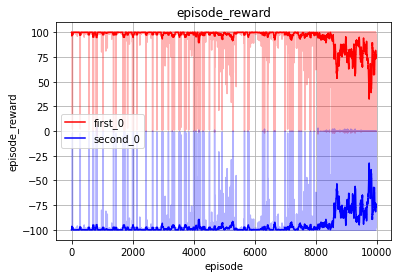

In [7]:
file_name =  '20220405_1609_exploit/pettingzoo_boxing_v1_nash_dqn'
data = load_data(file_name) 
plot(data['episode_reward'], 'episode_reward', smooth_radius=20, savepath='reward.png')
plt.show()

../data/log/20220405_1609_exploit/slimevolley_SlimeVolley-v0_nash_dqn_factorized
dict_keys(['episode_reward', 'loss', 'episode_length'])


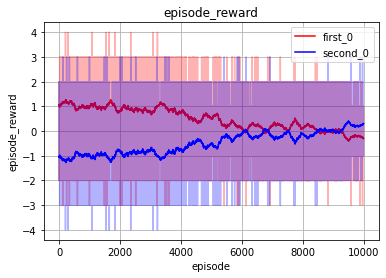

In [11]:
file_name =  '20220405_1609_exploit/slimevolley_SlimeVolley-v0_nash_dqn_factorized'
data = load_data(file_name)
plot(data['episode_reward'], 'episode_reward', smooth_radius=100, savepath='reward.png')
plt.show()

../data/log/20220405_1609_exploit/slimevolley_SlimeVolley-v0_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


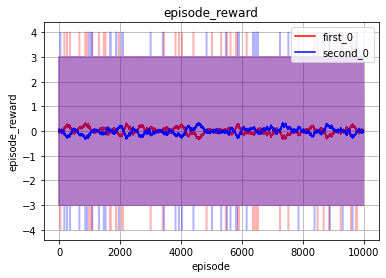

In [10]:
file_name =  '20220405_1609_exploit/slimevolley_SlimeVolley-v0_nash_dqn'
data = load_data(file_name)
plot(data['episode_reward'], 'episode_reward', smooth_radius=100, savepath='reward.png')
plt.show()